# Why the Agent Made that Decision: Explaining Deep Reinforcement Learning with Vision Masks

We provided a demo of `VisionMask` here to demonstrate its capabilities. We will make all necessary datasets and code for `VisionMask` publicly available once the paper is accepted.

In [2]:
from data.dataloader import MarioDataModule
from pathlib import Path
import os
import sys
from models import VisionMaskModel
import pytorch_lightning as pl
import torch
from PIL import Image

In [4]:
data_path = Path('/home/authors/work/visionmask_datasets/MARIO/ppo')
test_batch_size = 1
num_action = 7
dataset = 'MARIO'
agent_type = 'ppo'
visionmask_checkpoint = '/home/authors/jobs/visionmask_mario_dd20e53_ee2ab79/tb_logs/fit/20240503-205946/VisionMask/version_0/checkpoints/epoch=50-step=24735.ckpt'
agent_checkpoint = '/home/authors/work/VisionMask/trained_models/mario'
save_path = 'visionmask_results'
deletion_fraction = 0.1
insertion_fraction = 0.1
use_deletion_insertion = True

Load the Super Mario Bros. dataset

In [ ]:
data_module = MarioDataModule(
    data_path=data_path, test_batch_size=test_batch_size 
)

Load the trained VisionMask model

In [ ]:
model = VisionMaskModel(
    num_action=num_action, dataset=dataset, agent_type=agent_type,
    agent_checkpoint=agent_checkpoint, fix_classifier=True,
    learning_rate=1e-5, 
    mask_min_area=0.05, mask_max_area=0.1, entropy_regularizer=1.0,
    use_mask_variation_loss=True,
    mask_variation_regularizer=1.0, use_mask_area_loss=True,
    mask_area_constraint_regularizer=1.0, 
    mask_total_area_regularizer=1.0, ncmask_total_area_regularizer=0.3,
    save_masked_images=True, save_masks=False,
    save_path=save_path,
    deletion_fraction=deletion_fraction,
    insertion_fraction=insertion_fraction,
    use_deletion_insertion=use_deletion_insertion
)


model = VisionMaskModel.load_from_checkpoint(
    visionmask_checkpoint,
    num_action=num_action, dataset=dataset, agent_type=agent_type,
    agent_checkpoint=agent_checkpoint, fix_classifier=True,
    learning_rate=1e-5, 
    mask_min_area=0.05, mask_max_area=0.1, entropy_regularizer=1.0,
    use_mask_variation_loss=True, 
    mask_variation_regularizer=1.0, use_mask_area_loss=True,
    mask_area_constraint_regularizer=1.0, 
    mask_total_area_regularizer=1.0, ncmask_total_area_regularizer=0.3,
    save_masked_images=True, save_masks=False,
    save_path=save_path,
    deletion_fraction=deletion_fraction,
    insertion_fraction=insertion_fraction,
    use_deletion_insertion=use_deletion_insertion
)

Initiate the trainer from pytorch-lightning

In [ ]:
trainer = pl.Trainer(accelerator= 'gpu' if torch.cuda.is_available() else 'cpu', logger=False)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Start testing

In [ ]:
trainer.test(model=model, datamodule=data_module)

Testing DataLoader 0: 100%|██████████| 1/1 [01:53<00:00,  0.01it/s]TIME IS  0.9321767701767385  seconds
self.deletion_auc.std() tensor(nan)
self.deletion_auc.mean() tensor(0.0482)
self.insertion_auc.std() tensor(nan)
self.insertion_auc.mean() tensor(0.8435)
Testing DataLoader 0: 100%|██████████| 1/1 [01:53<00:00,  0.01it/s]


/home/rzuo02/venv/visionmask/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/home/rzuo02/work/explain-mario-ppo/NN-Explainer/src/models/explainer_classifier.py:447: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  print('self.deletion_auc.std()', self.deletion_auc.std())
/home/rzuo02/work/explain-mario-ppo/NN-Explainer/src/models/explainer_classifier.py:451: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  print('self.insertion_auc.std()', self.insertion_auc.std())

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         Accuracy          │            1.0            │
│          F-Score          │            nan            │
│         Precision         │    0.1428571492433548     │
│          Recall           │            nan            │
│         test_loss         │    0.1700989305973053     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.1700989305973053,
  'Accuracy': 1.0,
  'Precision': 0.1428571492433548,
  'Recall': nan,
  'F-Score': nan}]

Visualize the saliency map

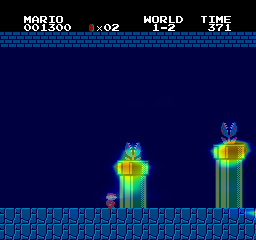

In [11]:
saliency_map = Image.open(Path(save_path) / 'heatmap' / '473.png')
# saliency_map.show()
i = 2
w = 256
saliency_map.crop((w * i, 0, w * i + w, 240))

Visualize the masked state

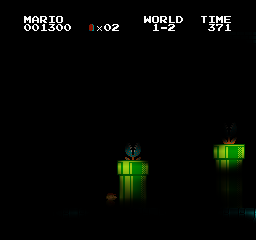

In [12]:
masked_state = Image.open(Path(save_path) / 'masked_images' / '473.png')
i = 2
w = 256
masked_state.crop((w * i, 0, w * i + w, 240))

Visualize the deletion/insertion curve

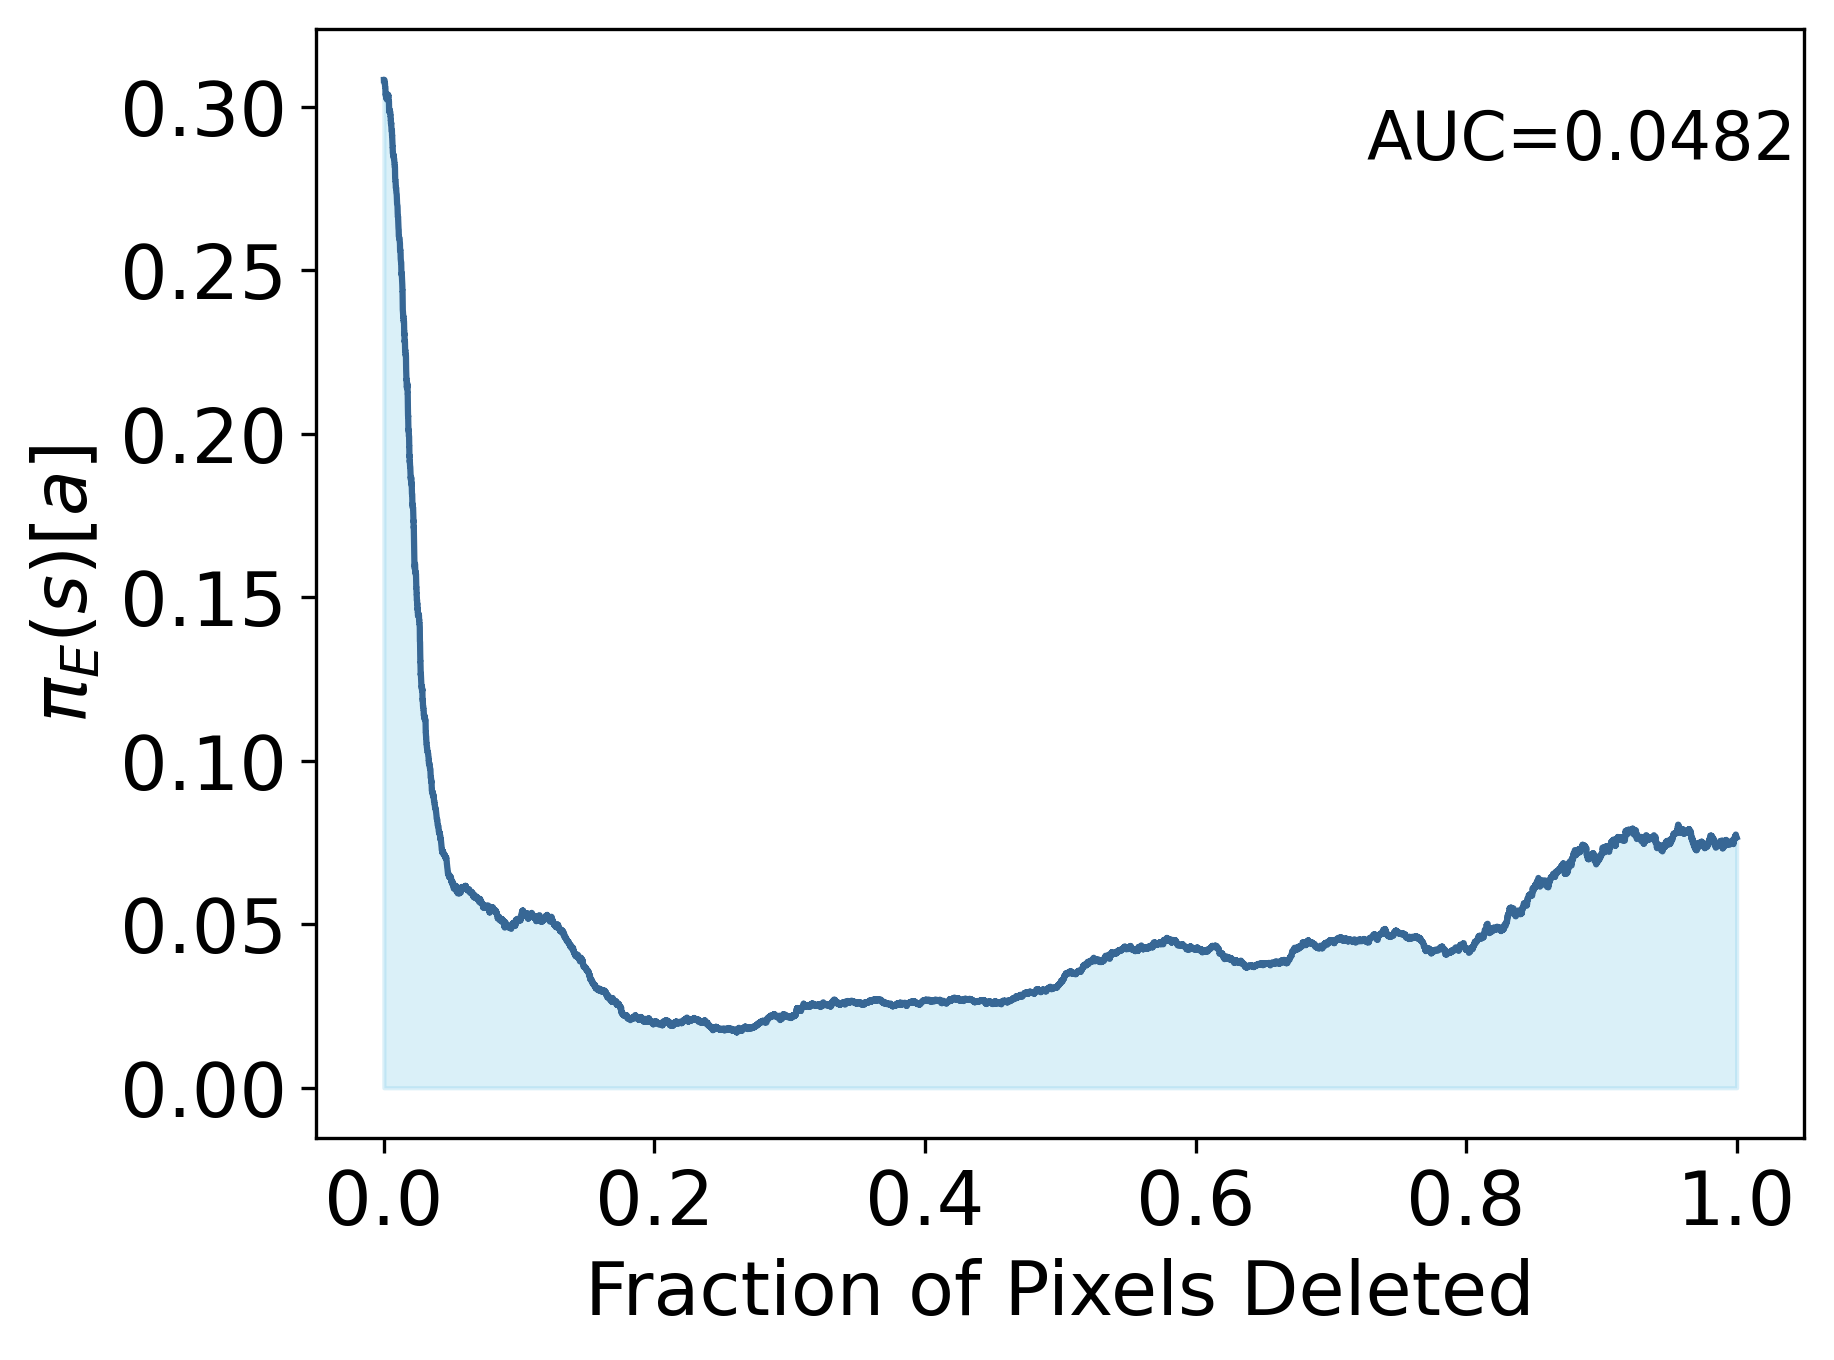

In [3]:
deletion_curve = Image.open(Path(save_path) / 'deletion' / '473.png')
insertion_curve = Image.open(Path(save_path) / 'insertion' / '473.png')
deletion_curve

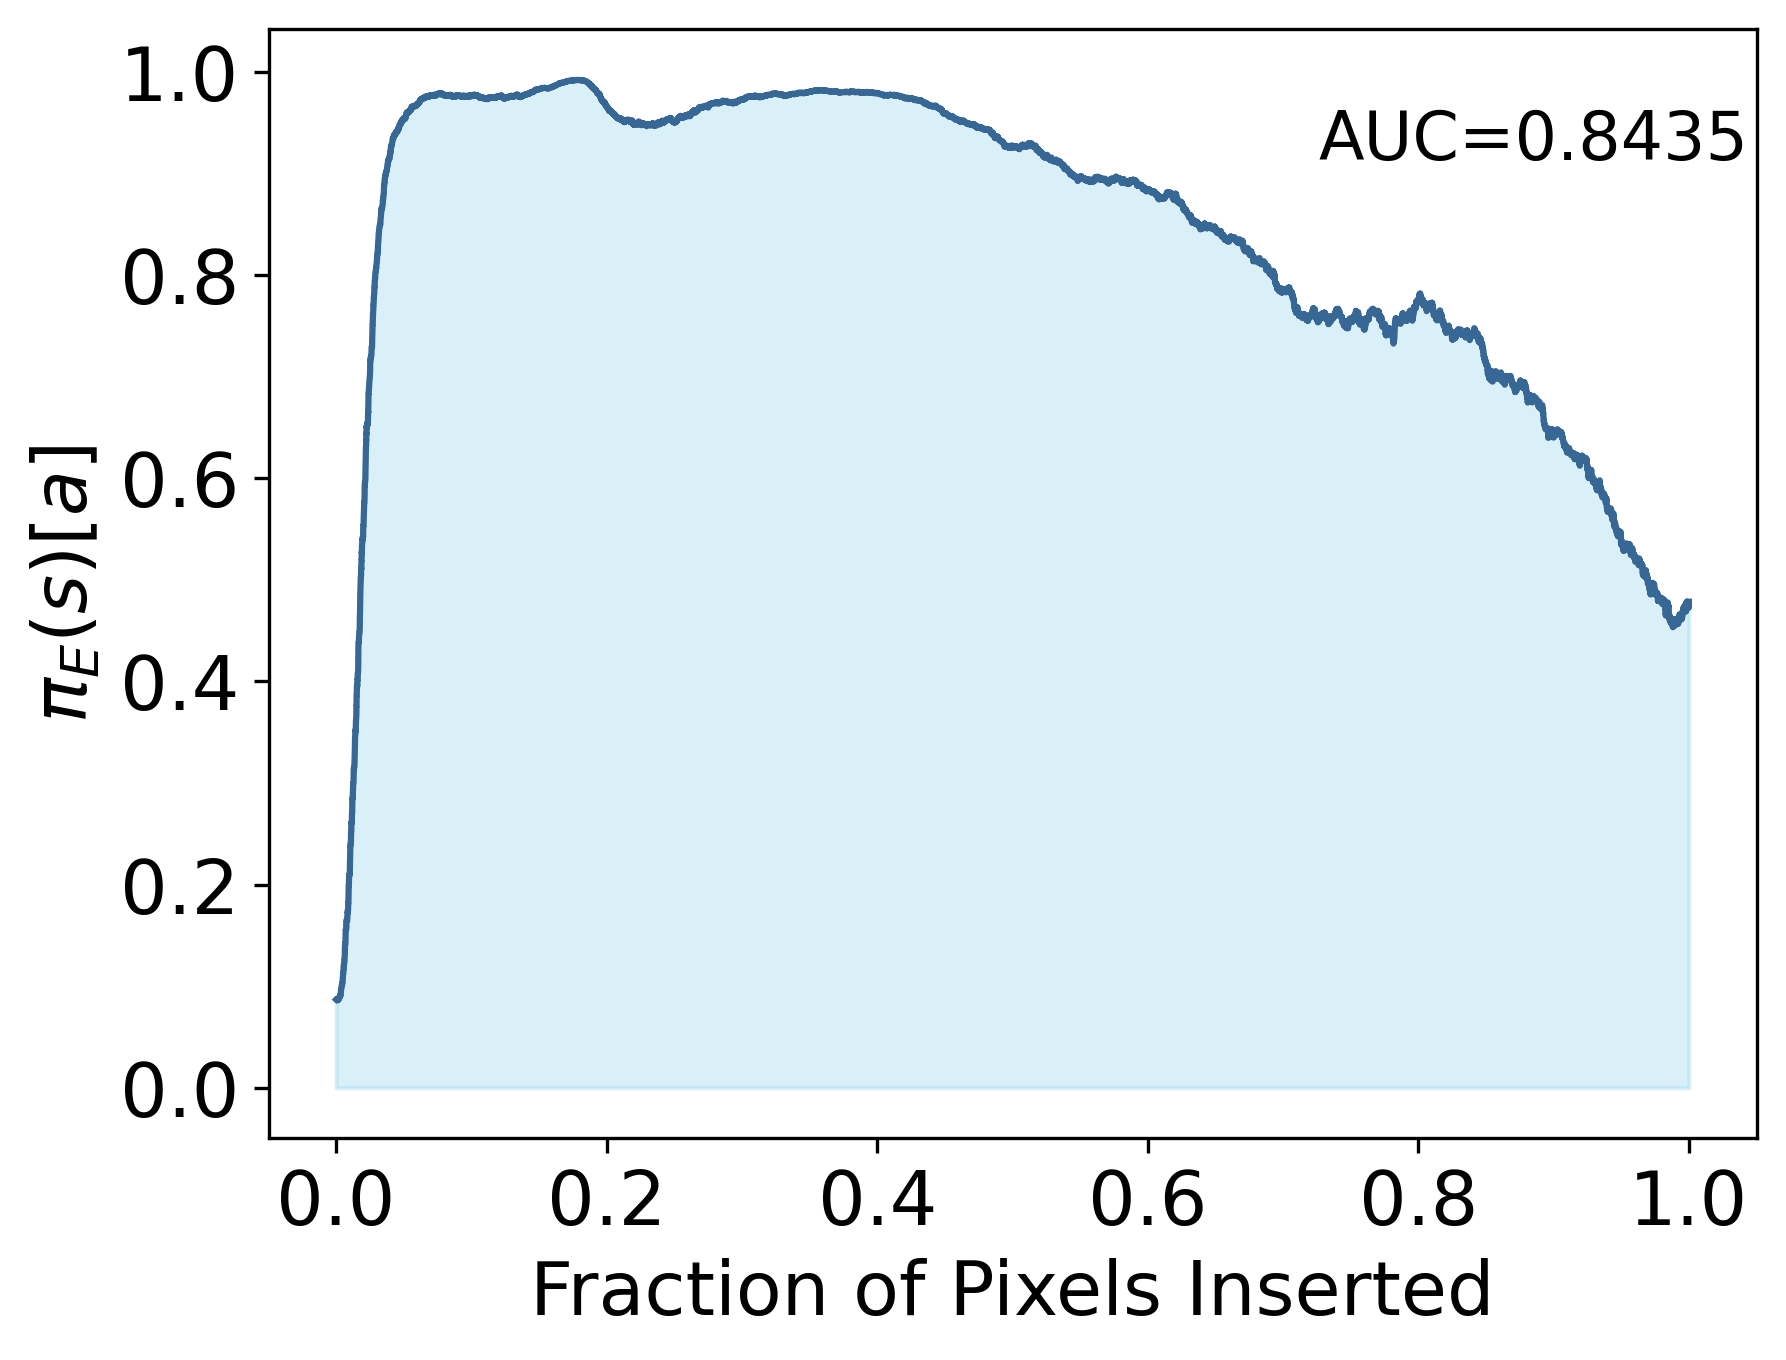

In [4]:
insertion_curve